In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_list = []
y_list = []

filename = 'housing_data.csv'

with open(filename, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        if line.strip():
            parts = line.strip().split(',')
            x_list.append(float(parts[0]))
            y_list.append(float(parts[1]))

X = np.array(x_list)
Y = np.array(y_list)

print(f"Loaded {len(X)} data points.")

Loaded 21 data points.


In [6]:
# Ordinary Least Squares (OLS) Implementation

N = len(X)

sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X * X)

m_ols = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
b_ols = (sum_y - m_ols * sum_x) / N

print(f"OLS Results -> Slope (m): {m_ols:.4f}, Intercept (b): {b_ols:.4f}")

def predict_ols(sq_ft):
    return m_ols * sq_ft + b_ols

price_ols = predict_ols(2500)
print(f"Price for 2,500 sq ft (OLS): ${price_ols:,.2f}")

OLS Results -> Slope (m): 171.1733, Intercept (b): 1627.3680
Price for 2,500 sq ft (OLS): $429,560.55


In [7]:
# Gradient Descent Implementation

x_mean = np.mean(X)
x_std = np.std(X)
y_mean = np.mean(Y)
y_std = np.std(Y)

X_norm = (X - x_mean) / x_std
Y_norm = (Y - y_mean) / y_std

m_gd_norm = 0.0
b_gd_norm = 0.0
learning_rate = 0.01
epochs = 1000

for _ in range(epochs):
    Y_pred = m_gd_norm * X_norm + b_gd_norm

    dm = (-2/N) * np.sum(X_norm * (Y_norm - Y_pred))
    db = (-2/N) * np.sum(Y_norm - Y_pred)

    m_gd_norm -= learning_rate * dm
    b_gd_norm -= learning_rate * db

m_gd = (y_std * m_gd_norm) / x_std
b_gd = y_mean + y_std * b_gd_norm - (y_std * m_gd_norm * x_mean / x_std)

print(f"GD Results  -> Slope (m): {m_gd:.4f}, Intercept (b): {b_gd:.4f}")

def predict_gd(sq_ft):
    return m_gd * sq_ft + b_gd

price_gd = predict_gd(2500)
print(f"Price for 2,500 sq ft (GD):  ${price_gd:,.2f}")

GD Results  -> Slope (m): 171.1733, Intercept (b): 1627.3687
Price for 2,500 sq ft (GD):  $429,560.55


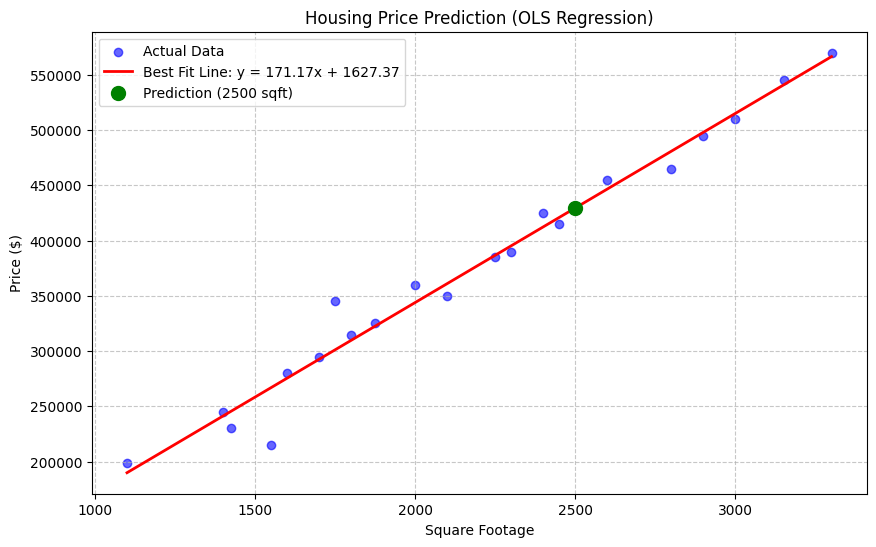

In [8]:
# Plotting the Original Data and the Line of Best Fit (using OLS parameters)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data', alpha=0.6)

line_x = np.linspace(X.min(), X.max(), 100)
line_y = m_ols * line_x + b_ols

plt.plot(line_x, line_y, color='red', linewidth=2, label=f'Best Fit Line: y = {m_ols:.2f}x + {b_ols:.2f}')

plt.scatter([2500], [price_ols], color='green', s=100, zorder=5, label='Prediction (2500 sqft)')

plt.title('Housing Price Prediction (OLS Regression)')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()